<a href="https://colab.research.google.com/github/VictorFu0717/AI/blob/main/skewness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# boxcox1p
# boxcox_normmax

0.012595465945990227


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


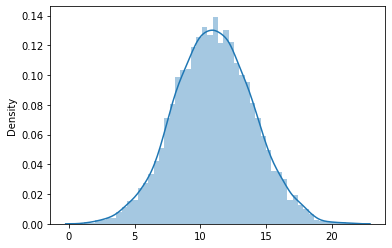

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p, log1p

p = np.random.normal(10, 3, 10000)
p = 1 + p[p>=0]
print(skew(p))
sns.distplot(p)

# skew = 0 常態分佈

1.4848637107826579


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


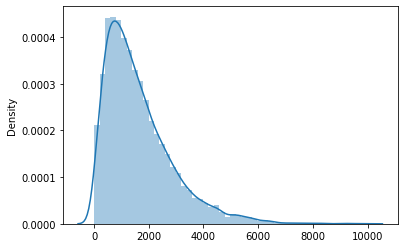

In [ ]:
p2 = p**3
print(skew(p2))
sns.distplot(p2)
# skew > 0 右偏
# 提高次方變成右偏，開根號變回常態分佈

lambda: 0.32580819469057926
after boxcox: -0.0028863732725775628


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


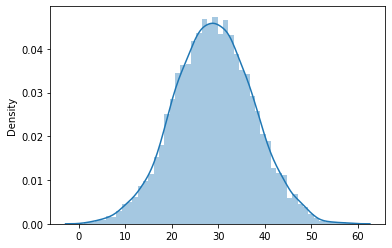

In [ ]:
lamda = boxcox_normmax(1 + p2)
print("lambda:", lamda)
trans = boxcox1p(p2, lamda)
print("after boxcox:", skew(trans))
sns.distplot(trans)

19.11619443112557


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


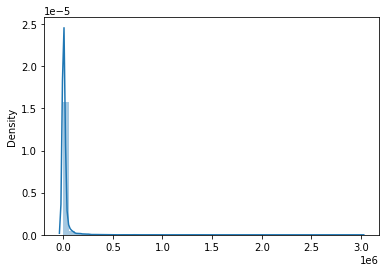

In [ ]:

p2 = np.power(2 ,p)
print(skew(p2))
sns.distplot(p2)

# 2的p次方，會極度的右偏, 取log可以讓他變回常態分佈

lambda: -0.004840355768593022
after boxcox: 0.0007427725333076446
after log: 0.02923675724668078


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


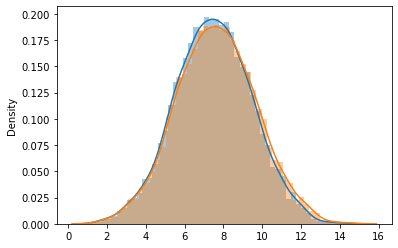

In [ ]:
lamda = boxcox_normmax(1 + p2)
print("lambda:", lamda)
trans = boxcox1p(p2, lamda)
print("after boxcox:", skew(trans))
sns.distplot(trans)
trans = log1p(p2)
print("after log:", skew(trans))
sns.distplot(trans)

-1.33187181493814


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


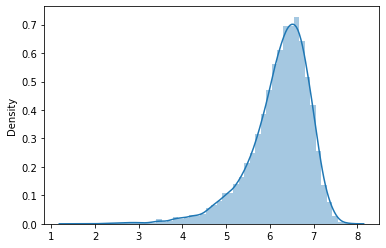

In [ ]:
p = np.random.normal(10000, 5000, 10000)
p = 1 + p[p >= 0]

p2 = p**(1/5)
print(skew(p2))
sns.distplot(p2)

# skew < 0 左偏
# 開根號變左偏,通常左偏不會太嚴重,除非值的差距很大, 次方可讓他變回常態分佈

lambda: 4.82195498831415
after boxcox: -0.02312653717771348


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


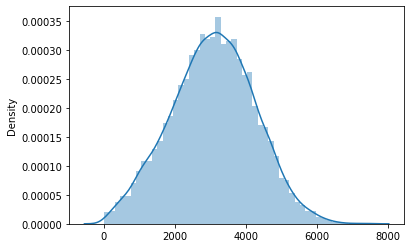

In [ ]:
lamda = boxcox_normmax(1 + p2)
print("lambda:", lamda)
trans = boxcox1p(p2, lamda)
print("after boxcox:", skew(trans))
sns.distplot(trans)

In [ ]:
# Scaling
# 1. Minmax : 最小值0, 最大值1
# 2. Standand: 平均0, 標準差1 
# 3. Robost Scaler: 消除離群點對於正常資料的影響
# 線性回歸不需要做scaling, 如果用利用梯度下降需要做scaling 

# 加上懲罰值避免過擬合
# Lasso:特徵挑選，減少不重要的特徵 (L1正則化)
# Ridge:平衡係數，懲罰過大係數  (L2正則化)